In [9]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [176]:
# cryptarchia lottery function

def phi(f, alpha):
    return 1 - (1-f)**alpha

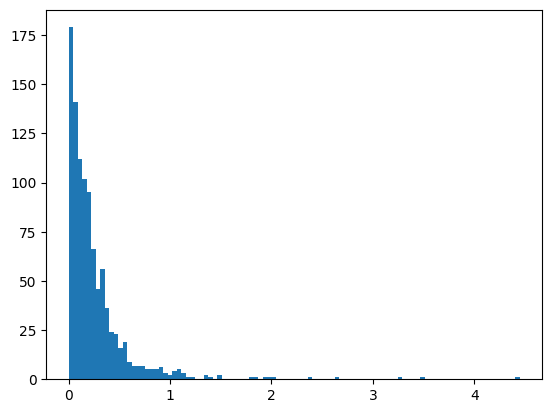

In [178]:
# Generate stake distribution

stake = np.random.pareto(5, 1000)
_ = plt.hist(stake, bins=100)

In [189]:
# True Total Stake
stake.sum()

np.float64(252.8198890263855)

In [185]:
T = 388800
f = 1/30
D_ell = 88.99380507797717


# Running one epoch of the cryptarchia lottery

alpha = stake / D_ell
p_lottery = phi(f, alpha)
wins = np.random.uniform(0, 1, (T, len(stake))) < p_lottery

In [190]:
# Total Stake Inference

empirical_slot_activation_rate = (wins.sum(axis=1) != 0).sum() / T
error = f - empirical_slot_activation_rate

beta = 0.8

h = beta * (D_ell / f)
D_next = D_ell - h * error
D_next

np.float64(214.7003014729989)